In [1]:
import numpy as np
from jedi_dataset import JediDataset
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import joblib

import pandas as pd
import scipy.io as sio

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from scipy.stats.stats import pearsonr   
from scipy.stats import zscore

In [2]:
features_path = '/home/arun/research/projects/crowdsourcing/kdd-2019/data/animal_breed_sdm/data_cat_flipped0.2'
jedi_dataset = JediDataset(features_path=features_path, name='cat')

In [3]:
jedi_dataset.train_X.shape, jedi_dataset.test_X.shape

((220, 512), (219, 512))

In [4]:
# get the metadata
meta_path = "/home/arun/research/projects/crowdsourcing/kdd-2019/data/animal_breed_sdm/nameMapping_fullInfo_flipped0.2.mat"
data = sio.loadmat(meta_path)['nameMapping']
rows = []
for d in data:
    rows.append([x[0] for x in d.tolist()])
df = pd.DataFrame(rows, columns=['img_name','common_name','dataset','train_test','class','is_flipped'])

In [5]:
df.head()

img_name  \
0  017b48ee703065873bb525dab52b0ed8_resize.jpg   
1  02cfc4cbbcf0eb8a0de91c8c2fde9ee3_resize.jpg   
2  033b7c459edd347e83e7f6d7dec1dfa1_resize.jpg   
3  055f220cefe63a12990ce04c36daa575_resize.jpg   
4  0717cc9a9ec6b1d0d0df0bbb0381c791_resize.jpg   

                                 common_name dataset train_test     class  \
0  DH0KCZVBYAJLREPQ293S61IN5TFMU4O7WXG8_0001   horse       test      wild   
1  E6358ALYVHDQPSJ21C7MWZ09INTKOR4XFUGB_0002   horse       test  domestic   
2  62PRESG3JZU8COX5TK47Q1ABVNFD90MYWILH_0003     cat      train      wild   
3  1JE0D9HCOQNPB6AYMS5XL4K27TVZFW3I8RGU_0004   horse       test      wild   
4  KT9ANEOFGJ310754CRL86VSYZQDWUH2BMPXI_0005     cat      train      wild   

  is_flipped  
0         []  
1         []  
2       nope  
3         []  
4    flipped

In [6]:
dataset = 'cat'
results_dir = '/home/arun/research/projects/crowdsourcing/kdd-2019/results'
influence_logistic = joblib.load(os.path.join(results_dir, '{0}/influence_scores_{0}_{1}.dat'.format(dataset, 'logistic')))
influence_unbiased = joblib.load(os.path.join(results_dir, '{0}/influence_scores_{0}_{1}.dat'.format(dataset, 'unbiased')))

In [7]:
cats_imgs_path = '/home/arun/research/projects/crowdsourcing/kdd-2019/data/animal_breed_sdm/data_cat_flipped0.2/all'

In [19]:
is_flipped = joblib.load('/home/arun/research/projects/crowdsourcing/kdd-2019/results/cat/example_flipped_cat_unbiased.dat')
n_points = is_flipped.shape[0]

x1 = []
x2 = []

for i in range(n_points):    
    if is_flipped[i]:
        x1.append(i)
        x2.append(2)

x1 = np.asarray(x1)
x2 = np.asarray(x2)

Text(0.5,1,'Plot of influence scores for dog, Minimum, Maximum and Mean')

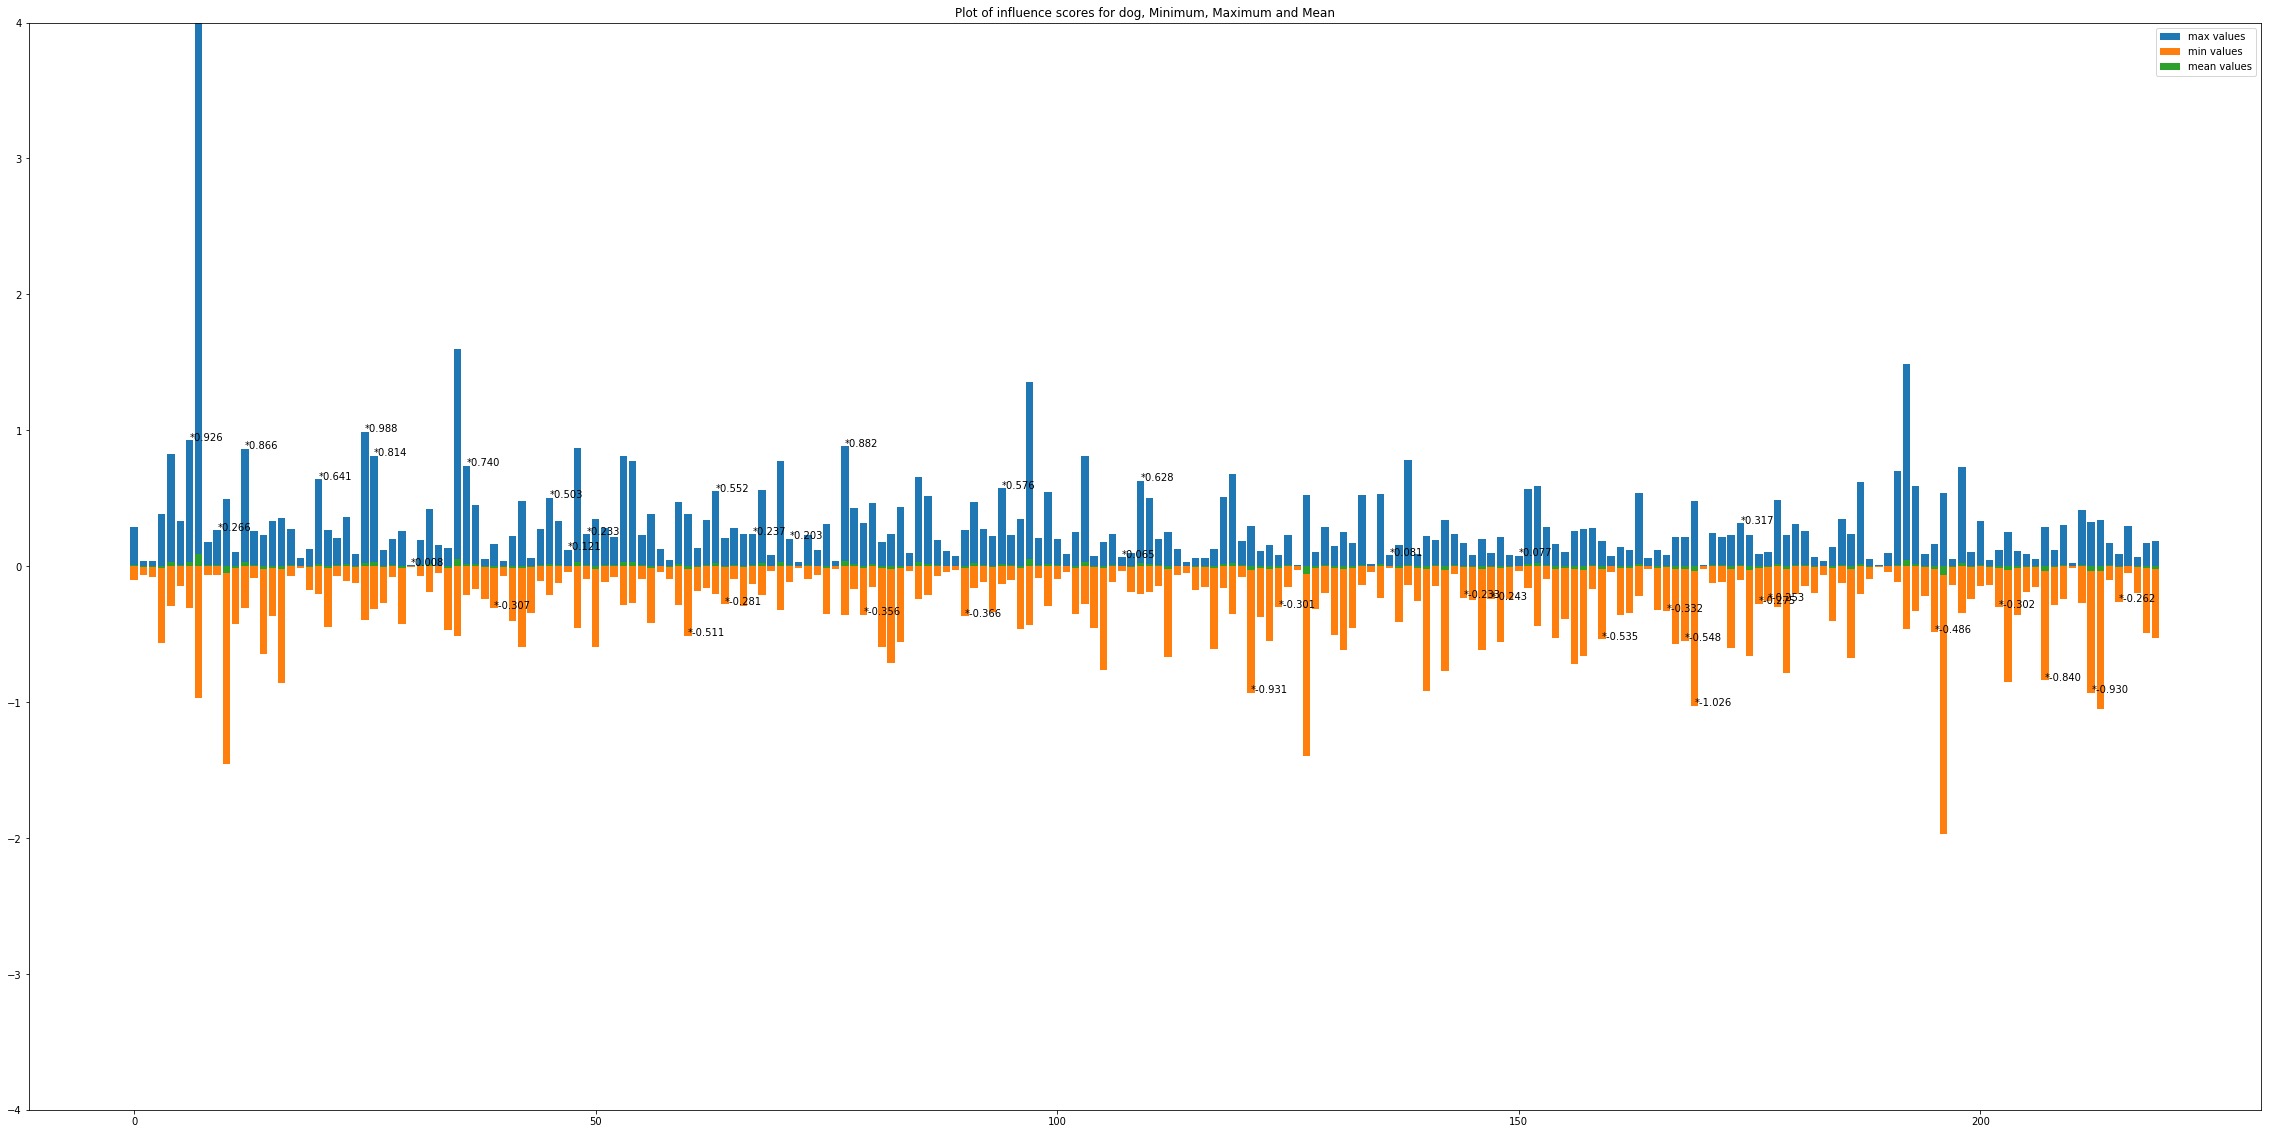

In [42]:
x = np.arange(influence_unbiased.shape[0])[:220]
max_values = np.max(influence_unbiased, axis=1)[:220]
min_values = np.min(influence_unbiased, axis=1)[:220]
mean_values = np.mean(influence_unbiased, axis=1)[:220]



plt.figure(figsize=(40,20))

for i in range(n_points):
    if is_flipped[i]:
        _x = i
        _val = 0.0
        if np.abs(max_values[i]) > np.abs(min_values[i]):
            _y = max_values[i] 
            _val = max_values[i]
        else:
            _y = min_values[i]
            _val = min_values[i]
        
        plt.annotate('*{:0.3f}'.format(_val), xy=(_x, _y), xytext=(_x, _y))

plt.bar(x, max_values, label='max values')
plt.bar(x, min_values, label='min values')
plt.bar(x, mean_values, label='mean values')

plt.ylim(-4.,4.)
plt.legend()
plt.title('Plot of influence scores for dog, Minimum, Maximum and Mean')
# plt.savefig('/')


Text(0.5,1,'Plot of influence scores for dog, Minimum, Maximum and Mean')

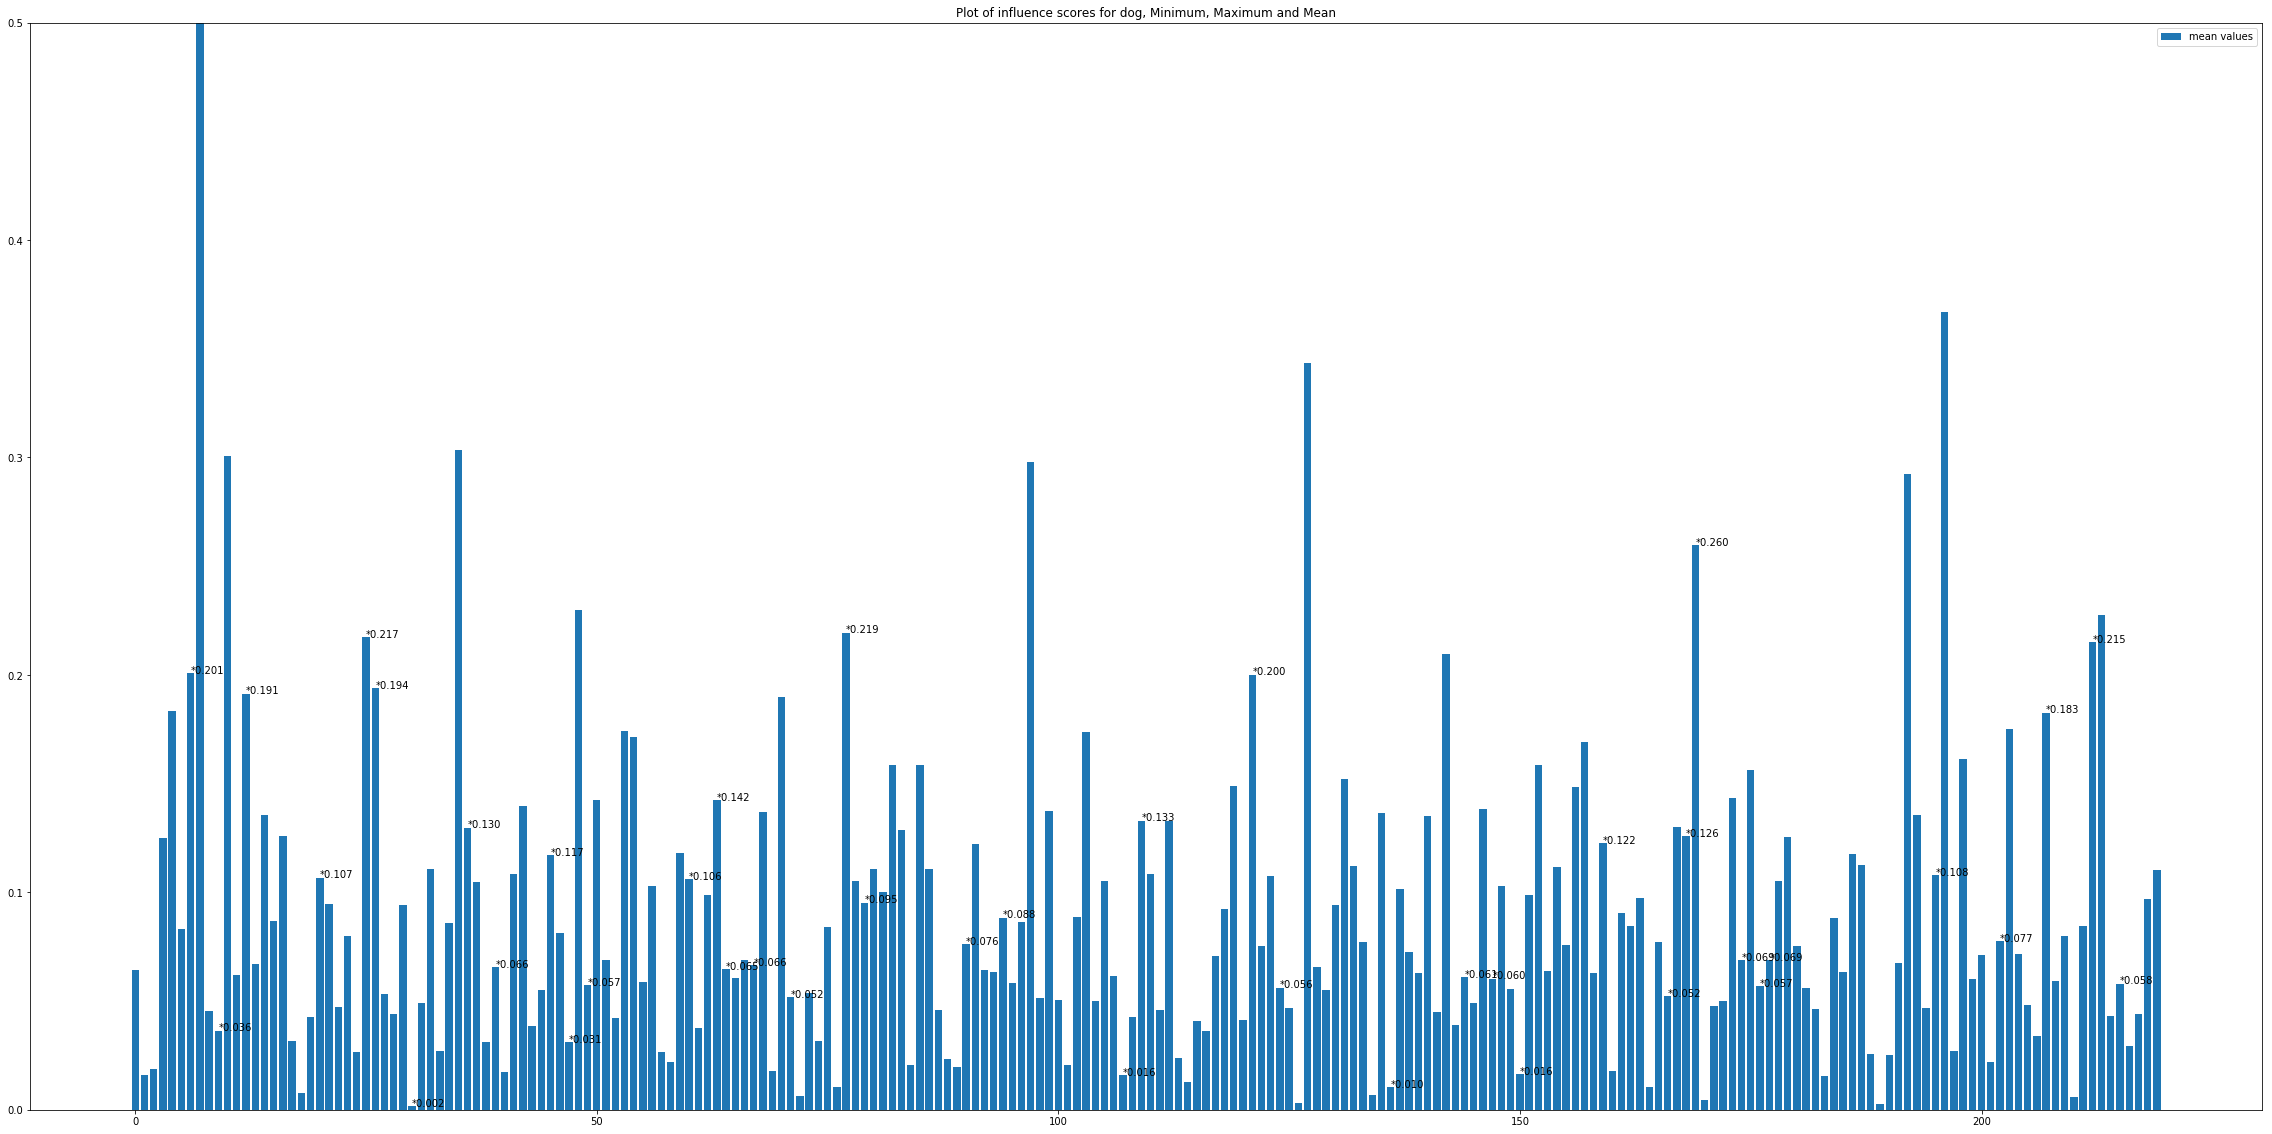

In [43]:
x = np.arange(influence_unbiased.shape[0])[:220]
mean_values = np.mean(np.abs(influence_unbiased), axis=1)[:220]



plt.figure(figsize=(40,20))

for i in range(n_points):
    if is_flipped[i]:
        _x = i
        _y = mean_values[i]
        _val = mean_values[i]
        
        plt.annotate('*{:0.3f}'.format(_val), xy=(_x, _y), xytext=(_x, _y))

# plt.bar(x, max_values, label='max values')
# plt.bar(x, min_values, label='min values')
plt.bar(x, mean_values, label='mean values')

plt.ylim(0,.5)
plt.legend()
plt.title('Plot of influence scores for dog, Minimum, Maximum and Mean')
# plt.savefig('/')


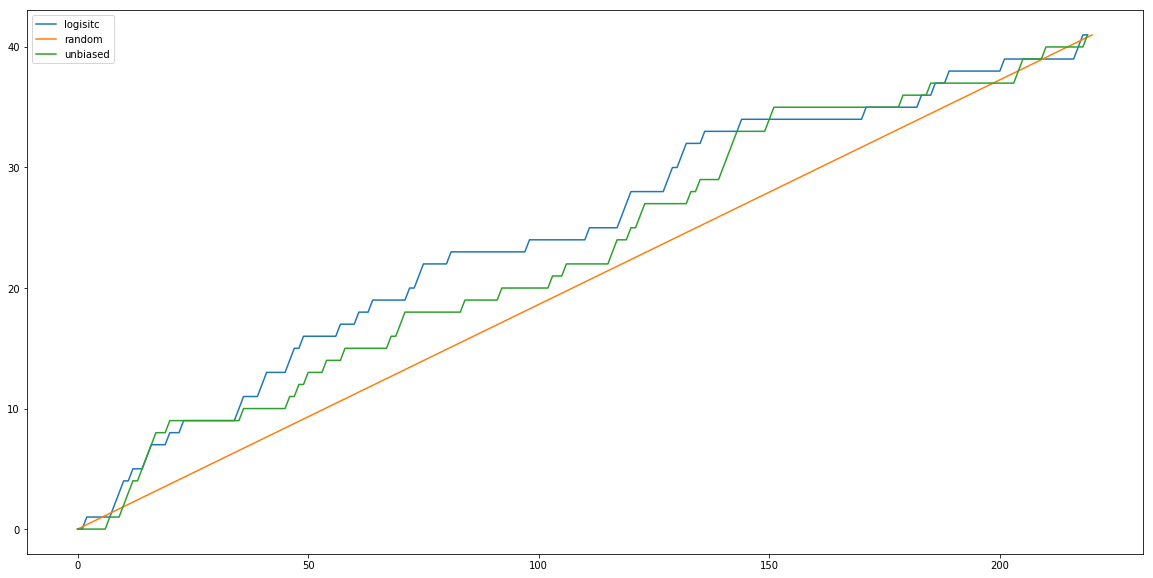

In [46]:
x = np.arange(influence_unbiased.shape[0])[:220]

mean_values_logistic = np.mean(np.abs(influence_logistic), axis=1)[:220]
mean_values_unbiased = np.mean(np.abs(influence_unbiased), axis=1)[:220]

# mean_values_logistic = np.mean(influence_logistic, axis=1)[:257]
# mean_values_unbiased = np.mean(influence_unbiased, axis=1)[:257]



sort_idx = np.argsort(-mean_values_logistic)
y = []
y2 = []
counter = 0
counter2 = 0
for i in range(220):
    idx = sort_idx[i]
    if is_flipped[idx]:
        counter+=1
    
    if i%5 == 0:
        counter2 += 1
    
    y2.append(counter2)
    y.append(counter)

plt.figure(figsize=(20,10))
plt.plot(x,y, label='logisitc')
plt.plot([0,220],[0, 41], label='random')


sort_idx = np.argsort(-mean_values_unbiased)
y = []
counter = 0
for i in range(220):
    idx = sort_idx[i]
    if is_flipped[idx]:
        counter+=1
    
    y.append(counter)

plt.plot(x,y, label='unbiased')
plt.legend()


In [47]:
pearsonr(mean_values_logistic, mean_values_unbiased)

(0.16480027712581666, 0.014396526946920224)

In [48]:
file_names = jedi_dataset.train_file_names + jedi_dataset.test_file_names

class_names = []
for f in file_names:
    class_names.append( df[df.common_name == f.split('.')[0]]['class'].values[0])

In [49]:
def plot_images(probs, n_vals = 20, top=True):
    
    if top:
        indices = np.argsort(-probs)[:n_vals]
    else:
        indices = np.argsort(probs)[:n_vals]
    
    fig = plt.figure(figsize=(20,20))
    
    for i in range(n_vals):
        idx = indices[i]
        img_path = os.path.join(cats_imgs_path, file_names[idx])
        img=mpimg.imread(img_path)
        fig.add_subplot(4, 5, i+1)
        plt.imshow(img)
        plt.title('{:0.3f} - {} - {}'.format(probs[idx],is_flipped[idx], class_names[idx]))
    
    

# Logistic

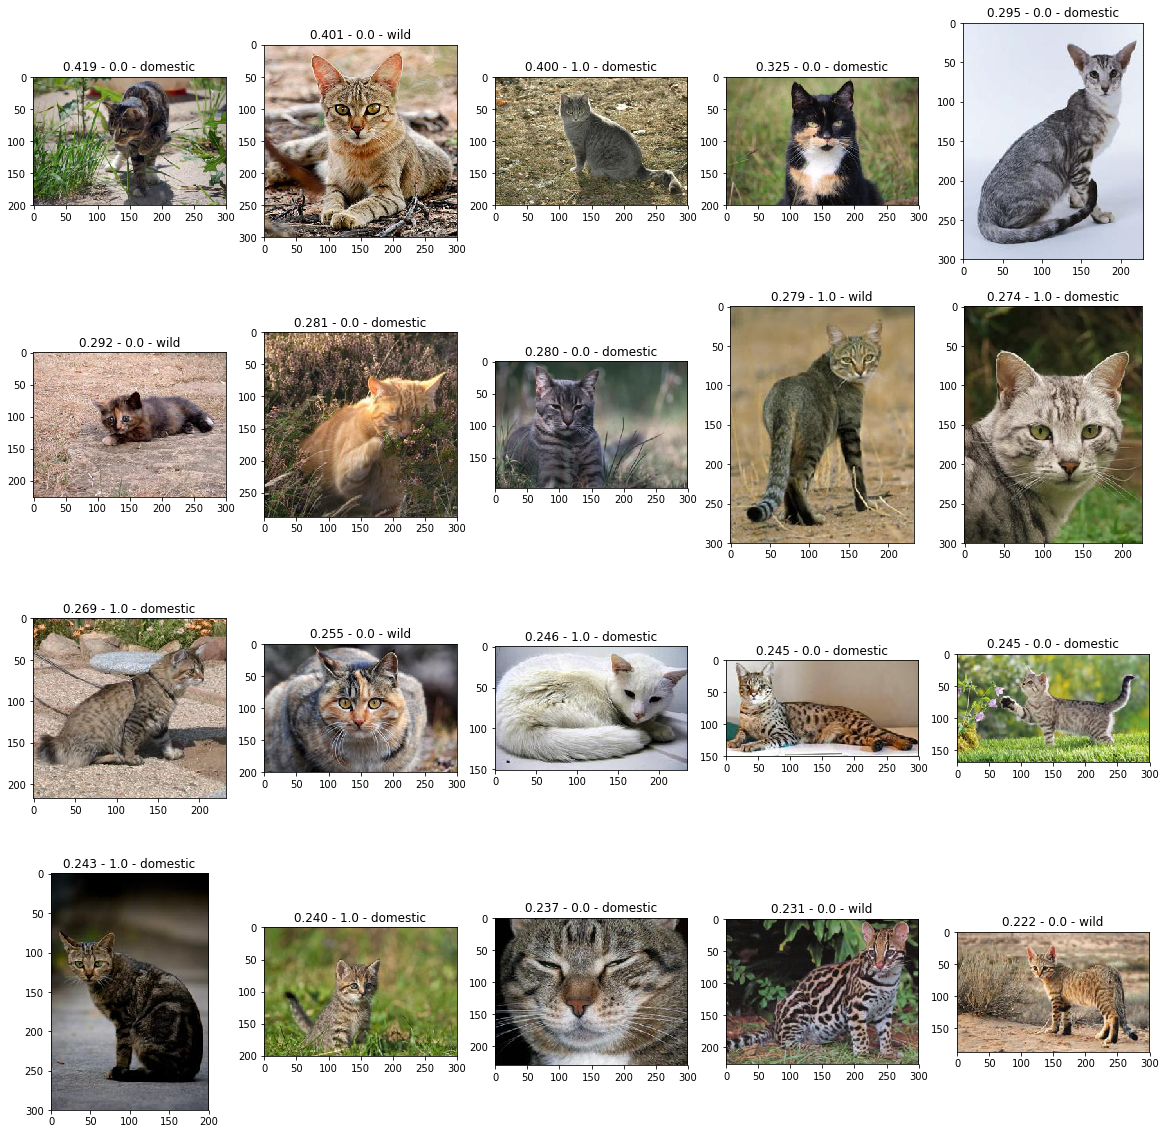

In [50]:
plot_images(mean_values_logistic)

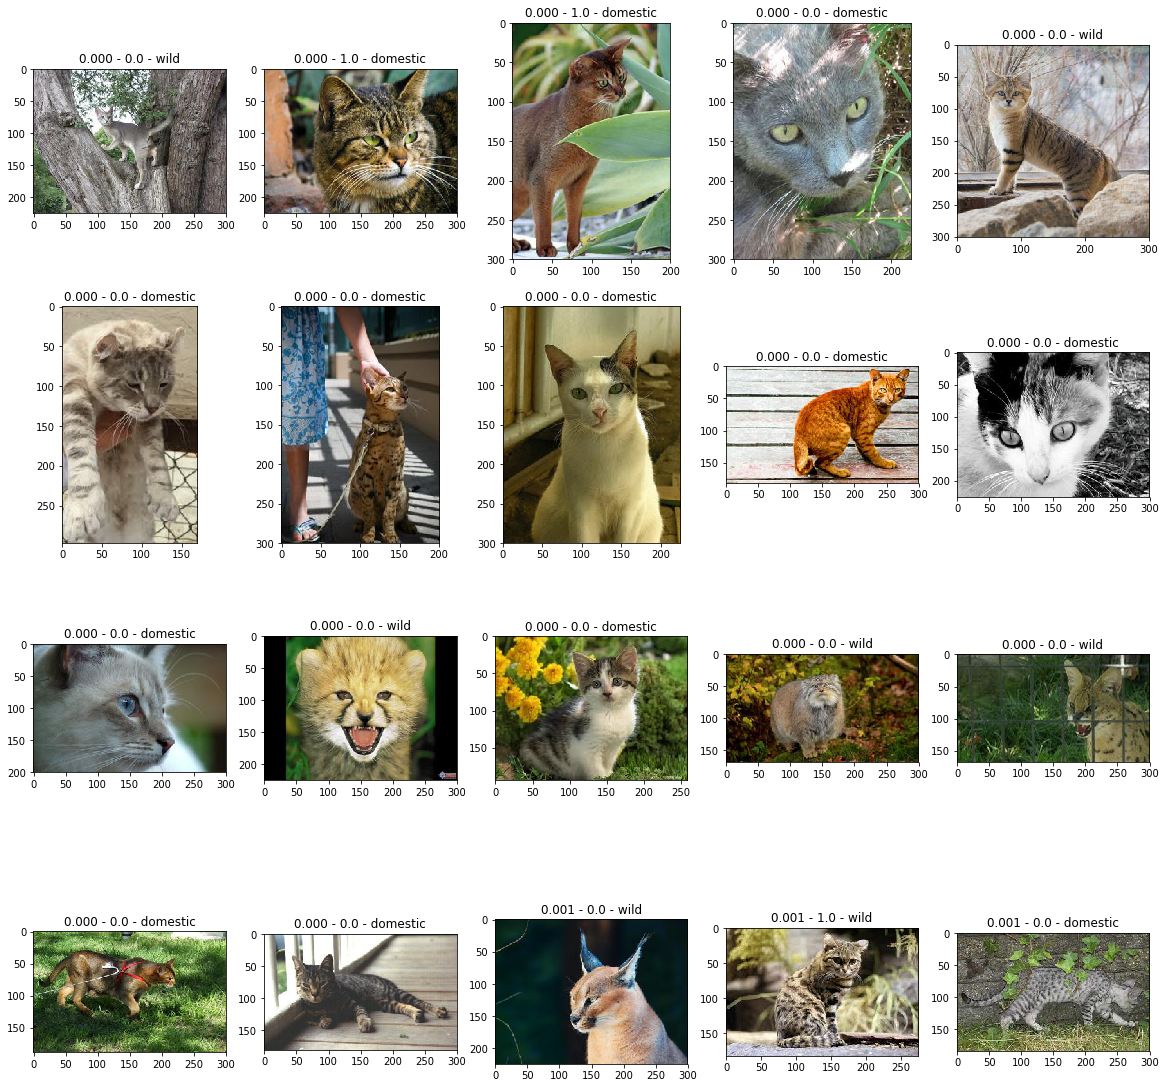

In [51]:
plot_images(mean_values_logistic, top=False)

# Unbiased

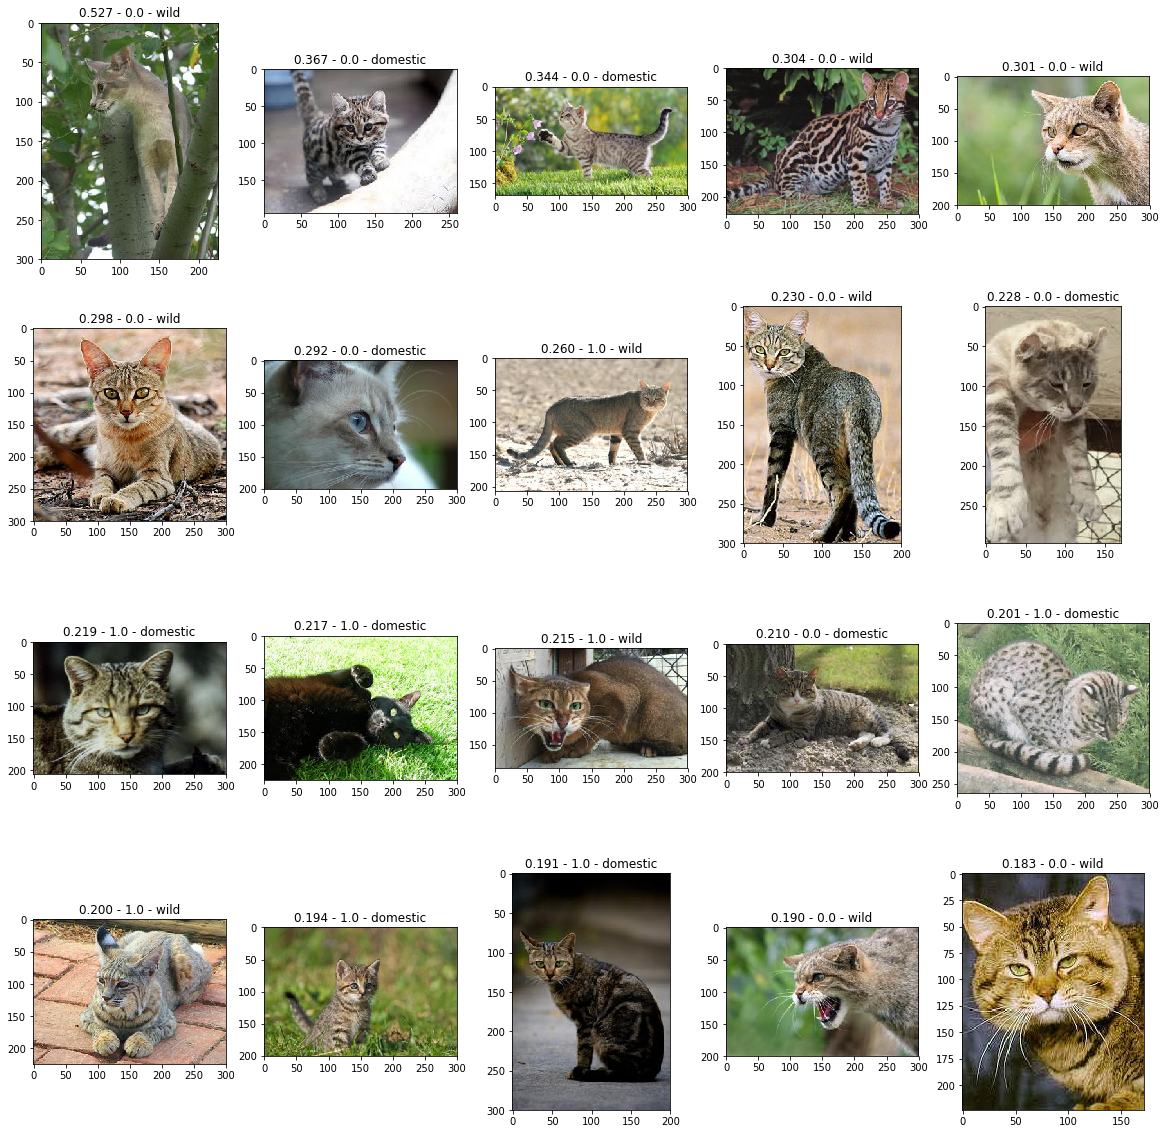

In [52]:
plot_images(mean_values_unbiased, top=True)

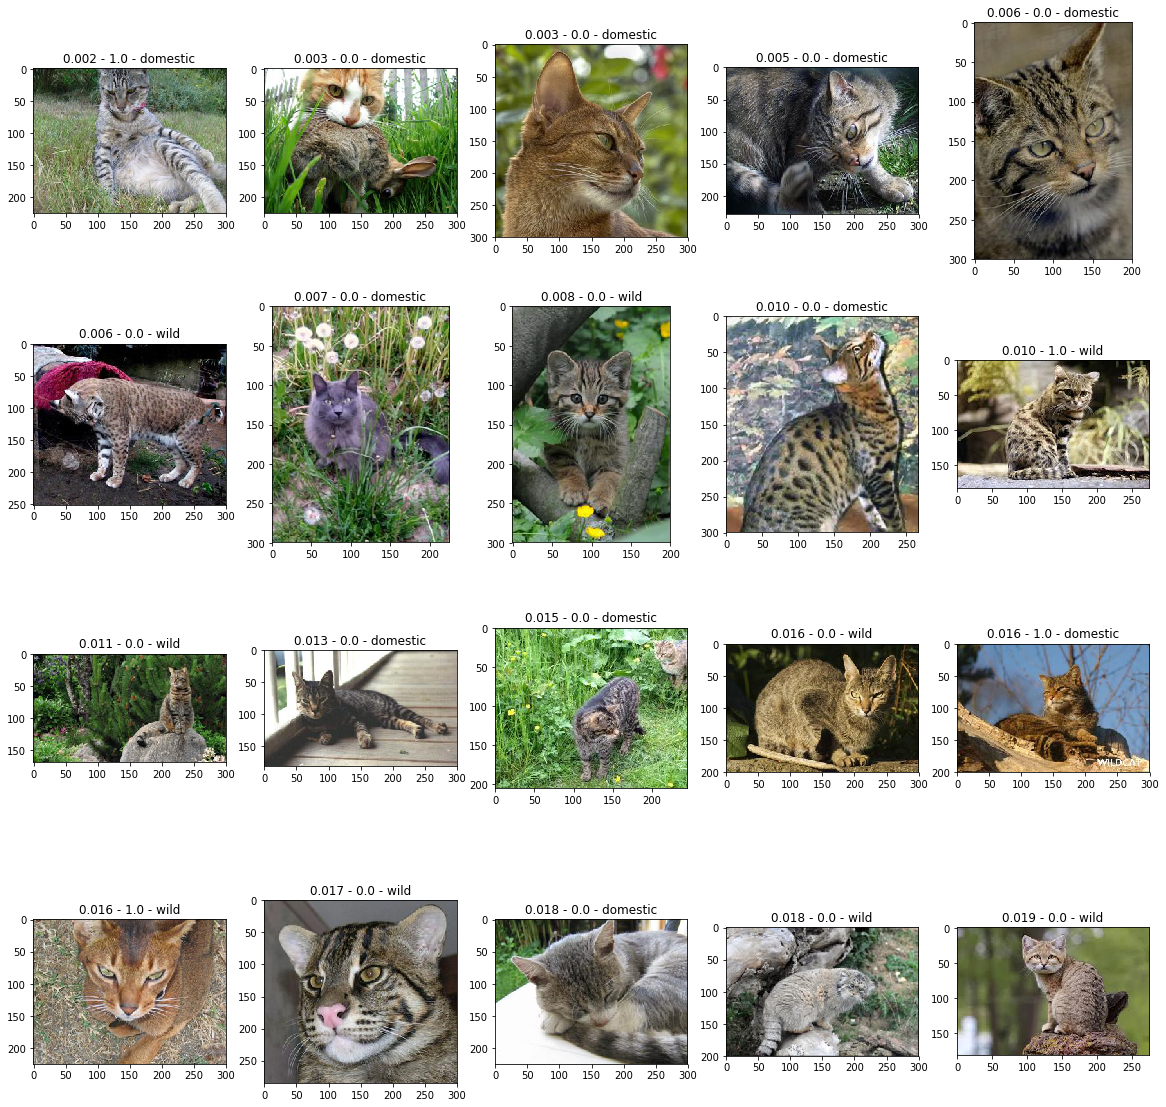

In [53]:
plot_images(mean_values_unbiased, top=False)

# Marginal distance

In [34]:
marginal_dist_logistic = joblib.load('/home/arun/research/projects/crowdsourcing/kdd-2019/cache/dog/marginal_distance_dog_logistic.dat')
marginal_dist_unbiased = joblib.load('/home/arun/research/projects/crowdsourcing/kdd-2019/cache/cat/marginal_distance_cat_unbiased.dat')

In [54]:
marginal_dist_logistic = MinMaxScaler().fit_transform(marginal_dist_logistic.reshape(-1,1)).reshape(-1)[:220]
marginal_dist_unbiased = MinMaxScaler().fit_transform(marginal_dist_unbiased.reshape(-1,1)).reshape(-1)[:220]

In [55]:
from scipy.stats.stats import pearsonr   
from scipy.stats import zscore

In [58]:
pearsonr(zscore(mean_values_logistic), zscore(marginal_dist_logistic))

(0.054809810145994543, 0.41855084508757334)

In [59]:
pearsonr(zscore(mean_values_unbiased), zscore(marginal_dist_unbiased))

(-0.22977532678019741, 0.0005930435812536674)